In [1]:
%load_ext autoreload

In [2]:
from ML.machine_learning_models import *
# ML utils
from ML.ml_utils_reg import create_directory, ECFP4, potency_classes, maxminpicker
%autoreload 2

# Load dataset

In [3]:
# Dataset path
db_path = "./dataset/Datasets Chembl/"

# Load actives dB
regression_db_all = pd.read_csv(db_path + f'chembl_30_IC50_500_CPDs.csv')
regression_db_all['potency_class'] = potency_classes(regression_db_all.pPot.values, [5, 7, 9, 11])
regression_db_all

,nonstereo_aromatic_smiles,standard_type,pPot,chembl_cid,chembl_tid,Potency class,potency_class
0,COc1cccc2c1CCN(S(=O)(=O)c1cccc(C(=O)Nc3ccc(Cl)...,IC50,5.300000,CHEMBL520827,CHEMBL235,5 - 6,5
1,Cc1nsc(C)c1CCC1CCN(S(=O)(=O)CC(C)(CC(C)c2ncc(F...,IC50,5.619789,CHEMBL1683460,CHEMBL333,5 - 6,5
2,Cc1nonc1NS(=O)(=O)c1ccc(Oc2ccc(Cl)cc2-c2ccnn2C...,IC50,5.000000,CHEMBL2325553,CHEMBL4296,5 - 6,5
3,CCN(CCCCCCCCc1cccc(OC)c1)Cc1ccccc1OC,IC50,5.247952,CHEMBL3752227,CHEMBL220,5 - 6,5
4,CCN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1OC,IC50,5.501689,CHEMBL224553,CHEMBL220,5 - 6,5
...,...,...,...,...,...,...,...
40435,CC1NC(=O)c2cc(-c3c(F)ccc4c(=O)n(C)c(NC(C)(C)C)...,IC50,10.000000,CHEMBL3902148,CHEMBL2147,10 - 11,9
40436,CCOc1ccccc1-c1cc2c(NC(CCO)c3ccccc3)ncnc2[nH]1,IC50,10.000000,CHEMBL4760328,CHEMBL203,10 - 11,9
40437,COCc1ccc(COCc2csc3nc(C(=O)NCc4cccc(OC)c4)[nH]c...,IC50,10.096910,CHEMBL3337890,CHEMBL280,10 - 11,9
40438,CN1CCN(c2cccc(CCNC(=O)c3cnc(C#N)nc3NCC(C)(C)C)...,IC50,10.958607,CHEMBL414530,CHEMBL268,10 - 11,9


# Select TIDs

In [4]:
chembl_30_human_tid = regression_db_all.loc[regression_db_all.chembl_tid.isin(['CHEMBL333', 'CHEMBL268', 'CHEMBL280', 'CHEMBL203', 'CHEMBL279', 'CHEMBL2409', 'CHEMBL260', 'CHEMBL286'])]
chembl_30_human_tid

,nonstereo_aromatic_smiles,standard_type,pPot,chembl_cid,chembl_tid,Potency class,potency_class
1,Cc1nsc(C)c1CCC1CCN(S(=O)(=O)CC(C)(CC(C)c2ncc(F...,IC50,5.619789,CHEMBL1683460,CHEMBL333,5 - 6,5
17,Cc1noc(CN2CCC(CCOc3ccc(-c4cc5c(ncn5C)c(C#N)n4)...,IC50,5.940058,CHEMBL1669280,CHEMBL268,5 - 6,5
20,Cc1nsc(C)c1CCC1CCN(S(=O)(=O)CC(C)(CC(C)c2ncc(F...,IC50,5.337242,CHEMBL1683460,CHEMBL280,5 - 6,5
75,Cc1noc(C)c1CCC1CCN(S(=O)(=O)CC2(N(O)C=O)CCN(S(...,IC50,5.337242,CHEMBL1784342,CHEMBL280,5 - 6,5
96,CCN(CC)CCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2n1,IC50,5.869666,CHEMBL50470,CHEMBL203,5 - 6,5
...,...,...,...,...,...,...,...
40433,COc1cccc(CNC(=O)c2nc3scc(NC(=O)Cc4ccc(C(=O)O)c...,IC50,10.677781,CHEMBL3337903,CHEMBL280,10 - 11,9
40434,CCCc1ccc(CCC2C(=O)NC(C(=O)NC)Cc3ccc(cc3)OCCCCC...,IC50,10.000000,CHEMBL418291,CHEMBL333,10 - 11,9
40436,CCOc1ccccc1-c1cc2c(NC(CCO)c3ccccc3)ncnc2[nH]1,IC50,10.000000,CHEMBL4760328,CHEMBL203,10 - 11,9
40437,COCc1ccc(COCc2csc3nc(C(=O)NCc4cccc(OC)c4)[nH]c...,IC50,10.096910,CHEMBL3337890,CHEMBL280,10 - 11,9


# Generate F1 molecules

CHEMBL333


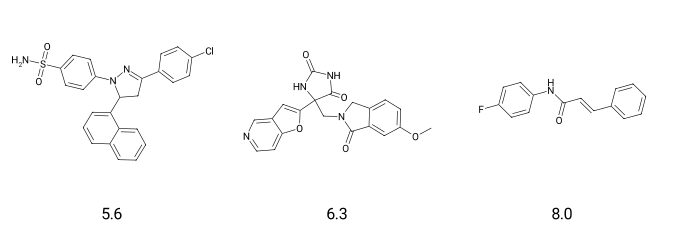

CHEMBL268


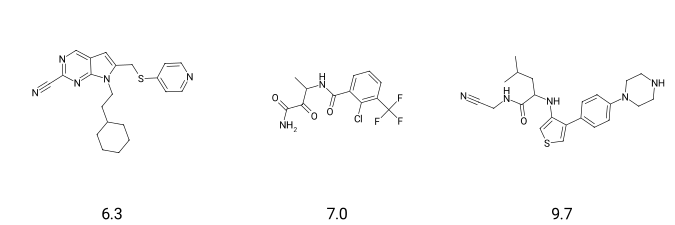

CHEMBL280


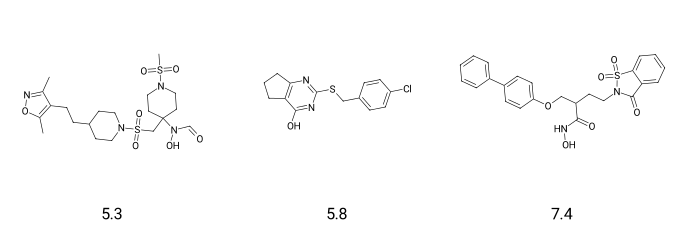

CHEMBL203


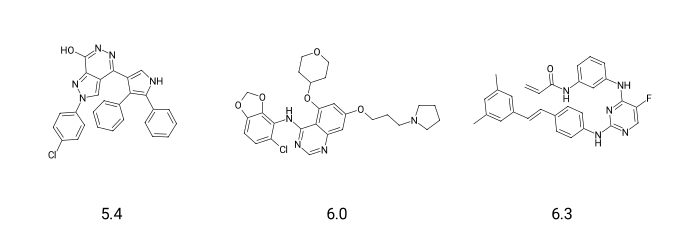

CHEMBL279


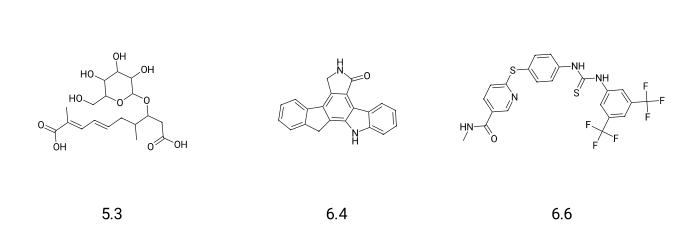

CHEMBL2409


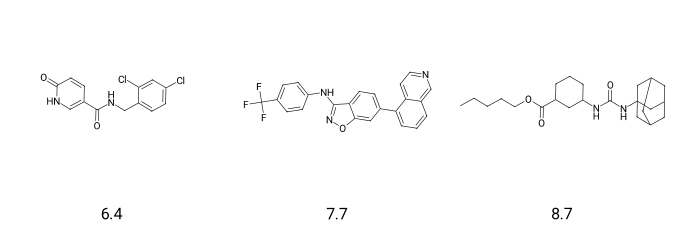

CHEMBL260


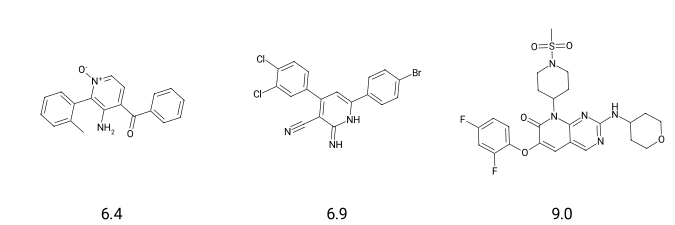

CHEMBL286


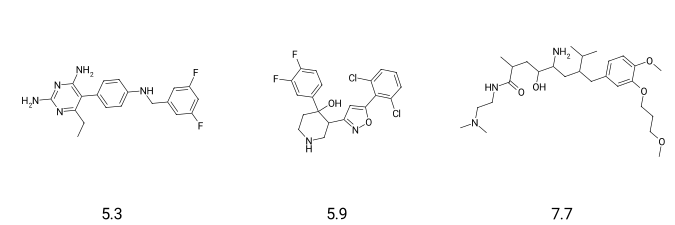

,nonstereo_aromatic_smiles,standard_type,pPot,chembl_cid,chembl_tid,Potency class,potency_class
0,NS(=O)(=O)c1ccc(N2N=C(c3ccc(Cl)cc3)CC2c2cccc3c...,IC50,5.569319,CHEMBL3622786,CHEMBL333,5 - 6,5
1,COc1ccc2c(c1)C(=O)N(CC1(c3cc4cnccc4o3)NC(=O)NC...,IC50,6.273273,CHEMBL4092752,CHEMBL333,6 - 7,5
2,O=C(C=Cc1ccccc1)Nc1ccc(F)cc1,IC50,8.037631,CHEMBL2336361,CHEMBL333,8 - 9,7
0,N#Cc1ncc2cc(CSc3ccncc3)n(CCC3CCCCC3)c2n1,IC50,6.318759,CHEMBL493246,CHEMBL268,6 - 7,5
1,CC(NC(=O)c1cccc(C(F)(F)F)c1Cl)C(=O)C(N)=O,IC50,6.969805,CHEMBL1289192,CHEMBL268,6 - 7,5
2,CC(C)CC(Nc1cscc1-c1ccc(N2CCNCC2)cc1)C(=O)NCC#N,IC50,9.698970,CHEMBL182956,CHEMBL268,9 - 10,9
0,Cc1noc(C)c1CCC1CCN(S(=O)(=O)CC2(N(O)C=O)CCN(S(...,IC50,5.337242,CHEMBL1784342,CHEMBL280,5 - 6,5
1,Oc1nc(SCc2ccc(Cl)cc2)nc2c1CCC2,IC50,5.769963,CHEMBL473326,CHEMBL280,5 - 6,5
2,O=C(NO)C(CCN1C(=O)c2ccccc2S1(=O)=O)COc1ccc(-c2...,IC50,7.376751,CHEMBL103442,CHEMBL280,7 - 8,7
0,Oc1nnc(-c2c[nH]c(-c3ccccc3)c2-c2ccccc2)c2cn(-c...,IC50,5.357535,CHEMBL3742200,CHEMBL203,5 - 6,5


In [12]:
from rdkit import Chem
from rdkit.Chem import Draw
top_picks = pd.DataFrame()
for tid, seed in [('CHEMBL333', 15), ('CHEMBL268', 6), ('CHEMBL280', 1), ('CHEMBL203', 1), ('CHEMBL279', 1), ('CHEMBL2409', 10), ('CHEMBL260', 4), ('CHEMBL286', 1)]:
    print(tid)
    chembl_30_sample = chembl_30_human_tid.loc[chembl_30_human_tid.chembl_tid == tid].reset_index(drop=True)
    #display(chembl_30_sample)
    fp = ECFP4(chembl_30_sample.nonstereo_aromatic_smiles.values)

    if tid == 'CHEMBL268':
        picks = [163, 234, 614]
    else:
        picks = maxminpicker(fp, 3, seed=seed)

    top_picks_tid = chembl_30_sample.iloc[picks].sort_values(by='pPot', ascending=True).reset_index(drop=True)
    top_picks = pd.concat([top_picks, top_picks_tid], axis=0)

    mols = [Chem.MolFromSmiles(smiles) for smiles in top_picks_tid.nonstereo_aromatic_smiles.values]

    from rdkit.Chem.Draw import rdMolDraw2D
    dopts = rdMolDraw2D.MolDrawOptions()
    dopts.prepareMolsForDrawing = True
    dopts.useBWAtomPalette()
    Draw.SetACS1996Mode(dopts, True)
    dopts.baseFontSize = 1
    img = Draw.MolsToGridImage( mols, molsPerRow=3, useSVG=True, legends= [f'{round(x,1)}' for x in top_picks_tid.pPot.values.tolist()], subImgSize=(225,225), drawOptions=dopts) #(250,250)
    display(img)

    folder_path = create_directory(f'./figures/F1/')
    file_path = f'./figures/F1/{tid}.svg'
    with open(file_path, 'w') as f:
        f.write(img.data)
    import cairosvg
    cairosvg.svg2png( url=file_path, write_to= f'./figures/F1/{tid}.png', scale=3)
    del img
top_picks

# Generate joined F1 molecules

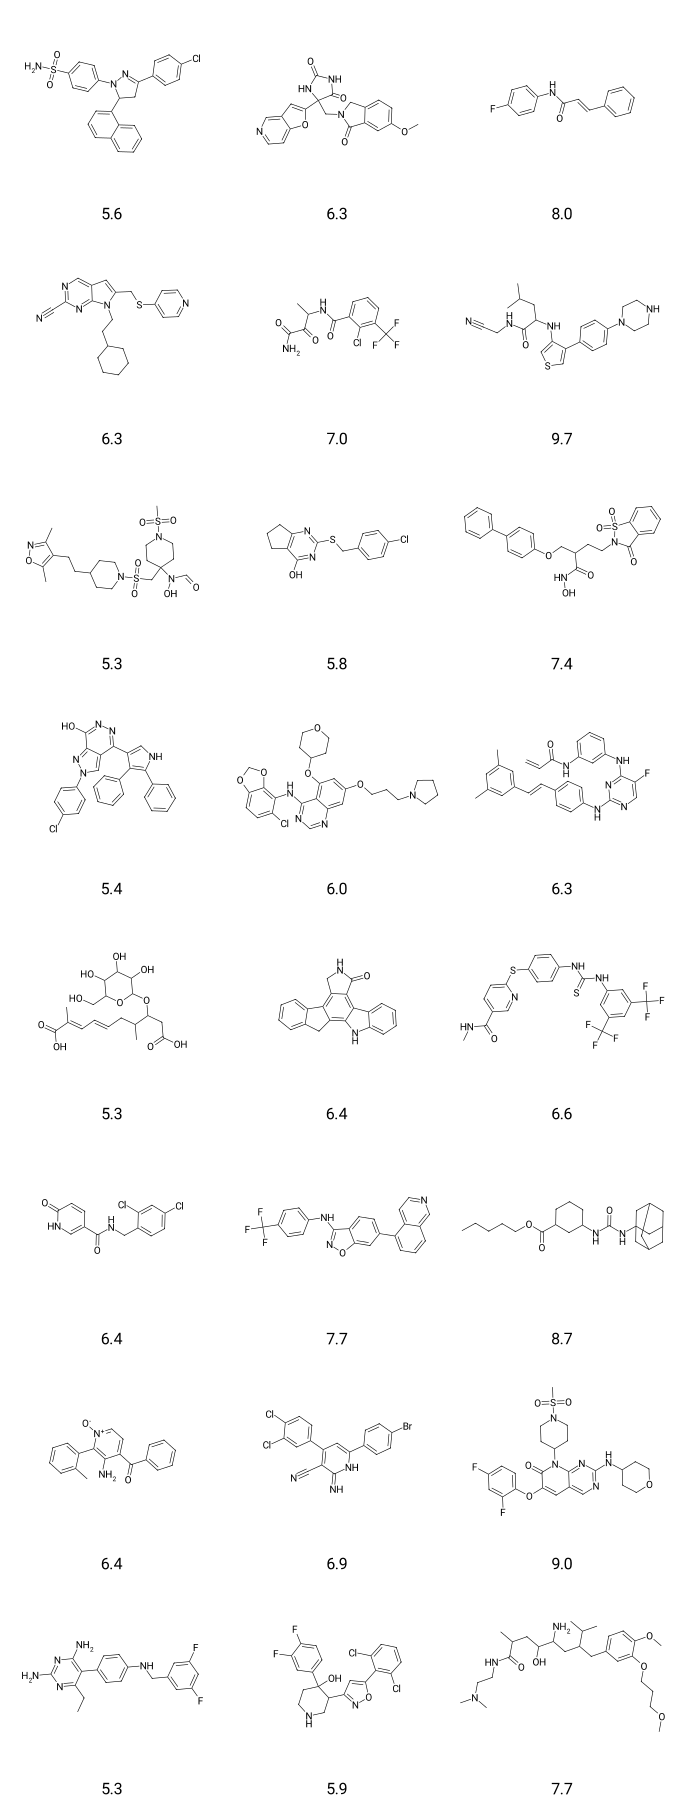

In [15]:
mols = [Chem.MolFromSmiles(smiles) for smiles in top_picks.nonstereo_aromatic_smiles.values]

from rdkit.Chem.Draw import rdMolDraw2D
dopts = rdMolDraw2D.MolDrawOptions()
dopts.prepareMolsForDrawing = True
dopts.useBWAtomPalette()
Draw.SetACS1996Mode(dopts, True)
dopts.baseFontSize = 1
img = Draw.MolsToGridImage( mols, molsPerRow=3, useSVG=True, legends= [f'{round(x,1)}' for x in top_picks.pPot.values.tolist()], subImgSize=(225,225), drawOptions=dopts) #(250,250)
display(img)
file_path = f'./figures/F1/all_classes.svg'
with open(file_path, 'w') as f:
    f.write(img.data)
import cairosvg
cairosvg.svg2png( url=file_path, write_to= f'./figures/F1/all_classes.png', scale=3)